# <div><span style="color: #ff98ab">P</span><span style="color: #ff9ba3">r</span><span style="color: #ff9e9a">o</span><span style="color: #ffa192">j</span><span style="color: #ffa489">e</span><span style="color: #ffa681">t</span><span style="color: #ffa978"> </span><span style="color: #ffac70">S</span><span style="color: #ffaf67">i</span><span style="color: #ffb66b">m</span><span style="color: #febd70">u</span><span style="color: #fec474">l</span><span style="color: #feca78">a</span><span style="color: #fed17c">t</span><span style="color: #fdd881">i</span><span style="color: #fddf85">o</span><span style="color: #f2dd86">n</span><span style="color: #e7db87"> </span><span style="color: #dcd888">N</span><span style="color: #d2d68a">u</span><span style="color: #c7d48b">m</span><span style="color: #bcd28c">é</span><span style="color: #b1cf8d">r</span><span style="color: #a6cd8e">i</span><span style="color: #a3cd97">q</span><span style="color: #9fcca0">u</span><span style="color: #9ccca9">e</span><span style="color: #99ccb2"> </span><span style="color: #96ccbb">E</span><span style="color: #92cbc4">N</span><span style="color: #8fcbcd">S</span><span style="color: #91c5cf">E</span><span style="color: #93bed1">E</span><span style="color: #95b8d3">I</span><span style="color: #98b2d5">H</span><span style="color: #9aabd6">T</span><span style="color: #9ca5d8"> </span><span style="color: #9e9eda">2</span><span style="color: #a098dc">0</span><span style="color: #a698dc">2</span><span style="color: #ac98dc">2</span><span style="color: #b298dc">-</span><span style="color: #b998dc">2</span><span style="color: #bf98dc">0</span><span style="color: #c598dc">2</span><span style="color: #cb98dc">3</span></div>
### $\textbf{Groupe}$     : 2SN B1 
### $\textbf{Nom}$        : CHEN
### $\textbf{Prénom}$     : Bryan
### Commentaire: 

# Informations pratiques

**Modalités pédagogiques** 

Le projet Simulation Numérique vise à vous faire découvrir un algorithme particulier en lien avec d'autres modules d'enseignement de cette année et d'illustrer certaines notions et propriétés à partir de programmes simples que vous devez écrire ou bien compléter. Le langage de programmation proposé est Python. Une connaissance basique de Python et de Numpy est suffisante. 

Cette année, il vous est demandé en premier lieu un travail de compréhension des algorithmes principaux sur la base du C/TD du 10/3/23 et des liens en fin de Notebook. Ensuite est demandé un travail d'implantation informatique simple (partie A) et quelques applications sur des images vous sont proposées (partie B). Ce travail est notamment guidé, des questions de compréhension sur les algorithmes sont posées en Partie C. La partie D vous permet d'implanter un algorithme populaire à titre de comparaison. Le volume de travail demandé est raisonnable.

**Enseignement**

Voici les informations concernant les séances (date, heure):

10/3/23 14.00-16.00 C/TD Groupes B1 et B2 (B306)

14/3/23 14.00-18.00 TP Groupe B1 (C306)

17/3/23 08.00-12.00 TP Groupe B2 (C203)

24/3/23 14.00-16.00 TD Séance de réponse à vos questions (B306)

**Evaluation**

L'évaluation se basera uniquement sur le Notebook que vous devrez rendre. 

**Date limite de rendu**:  19 avril 2023 à midi. 

**Contact**: xavier.vasseur@irit.fr

Merci d'indiquer [PSN] en sujet de votre email pour m'aider à identifier vos requêtes.

**Préambule** L'objectif de ce projet est d'analyser quelques algorithmes de factorisation structurée (déterministe ou aléatoire) de matrices de grande taille. Nous nous intéressons à des algorithmes de factorisation dits "Interpolative Decomposition (ID)" ou "CUR-ID", où l'on cherche à approcher au mieux une matrice en un produit de matrices de rang faible. Les algorithmes seront comparés si possible sous différents angles: temps de calcul, complexité opératoire, précision numérique notamment. Nous envisagerons également l'utilisation d'algorithme dit de factorisation non-négative en fin de projet.

**NB:** Il vous est demandé d'insérer vos commentaires et codes **uniquement** dans ce fichier Notebook. Vous avez toute liberté pour créer des cellules soit de texte soit de code. Vous devez disposer comme données de ce fichier et de quelques images au format .jpg. Le rendu sera uniquement ce fichier Notebook dans lequel vous devez insérer l'ensemble de vos résultats. 

Ce projet est en lien notamment avec les cours suivants:

   * Calcul scientifique
   * Algèbre linéaire pour le data mining
   * Optimisation II

In [57]:
#
# Chargement des bibliotheques pour la visualisation, l'algebre lineaire et l'analyse du temps de calcul 
#
import matplotlib.pyplot as plt
import numpy as np
from   scipy import fftpack
from   scipy.linalg import qr, norm, solve_triangular, svd
from   PIL import Image
import time

### Introduction.

L'approximation de rang faible que nous utiliserons dans ce projet se base sur une connaissance du rang exact ou du rang approché de la matrice étudiée. A titre informatif, la méthode suivante vous permet d'obtenir une majoration du rang d'une matrice rectangulaire $A$ telle que $ \|A - Q Q^T A \|_F \le \epsilon \|A \|_F$, $\epsilon$ désignant une tolérance choisie par l'utilisateur. Cette méthode sera donc utile par la suite dans vos expérimentations numériques, aucune modification n'est a priori requise. 


In [58]:
def adaptive_rank_determination(A,epsilon,blocking=16,iteration_max=10):
    """
    Adaptive rank determination based on randomization
    We look for an orthogonal matrix Q such that 
    $\|A - Q Q^T A \|_F \le \epsilon \|A \|_F$
    where $\|.\|_F$ denotes the Frobenius norm.
    
    Reference: 
    Adapted from Section 12 of P.G. Martinsson, "Randomized methods for matrix computations", 2019, 
    ArXiv 1607.01649 [https://arxiv.org/pdf/1607.01649.pdf]. The original algorithm corresponds to 
    Figure 12. 
    
    Input: 
    - A:         matrix to be analysed [array type] (of shape (m,n))
    - epsilon:   relative threshold related to the accuracy of the projection (in the Frobenius norm) (0<= epsilon <= 1)
    - blocking:  blocking parameter to be used in the implementation (for efficiency reasons) [int]
    
    Output:
    - Q:         matrix with orthonormal columns such that $ \|A - Q Q^T A \|_F \le \epsilon \|A \|_F$
    - erank:     estimated rank (upper bound of epsilon-rank(A)), erank is here a multiple of min(blocking,n). 
    - ratio:     current ratio of $\|A - Q Q^T A \|_F4$ divided by $\|A \|_F$
    - iteration: nombre d'itérations réalisé au sein de l'algorithme
    """ 
    
    m, n          = A.shape[:]
    # The blocking parameter should be less than the number of columns
    b             = min(blocking,n) #pour des raisons d'efficacité
    iteration     = 0
    # Update the maximal number of iterations according to b
    iteration_max = max(np.ceil(n/b),iteration_max) 
    norm_A_Fro = norm(A,'fro')
    
    while norm(A,'fro') > epsilon*norm_A_Fro and iteration < iteration_max:
        
        # Create R the random block based on Gaussian variables
        R      = np.random.randn(n,b)
        # Matrix-matrix product Y = AR 
        Y      = A@R #produit matriciel numpy ( à la place de np.dot ) 
        # QR decomposition of Y
        QY, RY = qr(Y,mode='economic')
        # Compute the projection 
        BY     = QY.T@A #transpose(Q)*A
        
        # Concatenate the information related to Q and B
        if iteration == 0:
            Q  = QY
            B  = BY
        else:
            Q  = np.concatenate((Q, QY),axis=1)
            B  = np.concatenate((B, BY),axis=0)
        
        # Update the iteration count
        iteration += 1
        
        # Update of A
        A = A - QY@BY
        
        # Upper bound of epsilon-rank
        erank = Q.shape[1]
        
    return Q, Q.shape[1], norm(A,'fro')/norm_A_Fro, iteration

*h1*

## Partie A.1

Proposer une implantation des différents algorithmes de décomposition vus en cours. Pour vous aider, une définition des fonctions et leurs squelettes sont proposés. Vous avez toute liberté pour les modifier. Ces algorithmes seront utilisés dans la partie de validation (Partie B) et applicative du Notebook (Partie C). Vous pourrez vous appuyer sur les <a href="https://arxiv.org/pdf/1607.01649.pdf">chapitres 10 et 11 des notes de cours de P.G. Martinsson</a>:


In [59]:
#Pour AJ = QR = [Q1 Q2][R11 R12; 0 R22]
def column_ID(A,k):
    """
    Compute a column interpolative decomposition such that 
    A \approx A[:,J] Z
    
    Input: 
    - A:  matrix to be analysed [array] (of shape (m,n))
    - k:  estimated rank of matrix A [int]
    
    Output:
    - J:  is the set of column indices [array, any type] (of shape k)
    - Z:  is the corresponding matrix (of shape (k,n))
     
    Reference: 
    Section 10.3 and Figure 7 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    """
    
    m, n = A.shape[:]
    Z    = np.zeros(shape=(k,n))
    
    #
    # TO DO
    #
    # Perform the economic decomposition of A with column pivoting 
    [Q, S, J] = qr(A,mode='economic', pivoting = True)    
    
    # Deduce the T=R11^{-1}R12 block  
    T = solve_triangular(S[:k,:k],S[:k,k:n])
    
    # Deduce J and Z 
    #Z[:,J] = [np.eye(k), T]
    Z[:,J] = np.concatenate((np.eye(k),T), axis=1)
    J = J[:k]
    
    #
    # END TO DO
    #
    
    return J,Z


def row_ID(A,k):
    """
    Compute a row interpolative decomposition such that 
    A \approx X A[I,:] 
    
    Input: 
    A matrix to be analysed [any type] (of shape (m,n))
    k: estimated rank of matrix A [int]
    
    Output:
    I  is the set of row indices [array, any type] (of shape k)
    X  is the corresponding matrix (of shape (m,k))
    
    Reference: Section 10.3 and Figure 7 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    """
    
    m, n = A.shape[:]
    X    = np.zeros(shape=(m,k))
    
    #
    # TO DO
    #
    
    # Perform the economic decomposition of A^T with column pivoting 
    [Q, S, J] = qr(A.T,mode='economic', pivoting = True)    
    
    # Deduce the T=R11^{-1}R12 block  
    T = solve_triangular(S[:k,:k],S[:k,k:m])
    
    # Deduce J and Z 
    X[J,:] = np.concatenate((np.eye(k),T), axis=1).T
    #X[J,:] = [np.eye(k), T].T
    I = J[:k]
    
        
    # Deduce the corresponding T block 
    
    
    
    # Deduce I and X 
    
    #
    # END TO DO
    #
    
    return I,X

def double_sided_ID(A,k):
    """
    Compute a double sided interpolative decomposition such that 
    A \approx X A(I,J) Z 
    
    Input: 
    A matrix to be analysed [array type] (of shape (m,n))
    k: estimated rank of matrix A [int]
    
    Output:
    I  is the set of row indices [array] (of shape k)
    J  is the set of column indices [array] (of shape k)
    X  is the corresponding matrix (of shape (m,k))
    Z  is the corresponding matrix (of shape (k,n))
    
    Reference: Section 10.3 and Figure 7 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    """
    #
    # TO DO
    #
    
    # Apply the column ID to A
    [J,Z] = column_ID(A,k)


    # Apply the row ID to A[:,J]
    [I,X] = row_ID(A[:,J],k)
    
    #
    # END TO DO
    #
    
    return I,J,X,Z

def extract_subblock(A,I,J):
    """
    Given a set of row and column indices, extract the submatrix 
    B = A[I,J]
    with I the set of row indices and J the set of column indices.
    
    Input: 
    A matrix to be analysed [array] (of shape (m,n))
    I  is the set of row indices  (of shape k)
    J  is the set of column indices  (of shape k)
    
    Output:
    Matrix A[I,J] [array] (of shape (k,k))
    """
    B = np.zeros(shape=(len(I),len(J)))
    row_index = 0
    
    for i in I:
        col_index = 0
        for j in J:
            B[row_index,col_index] = A[i,j]
            col_index = col_index + 1
            
        row_index = row_index + 1
    
    return B

def cur(A,k):
    """
    Deterministic version of the CUR algorithm based on the 
    double sided ID decomposition. 
    
    Input: 
    - A: matrix to be analysed [any type] (of shape (m,n))
    - k: estimated rank of matrix A [int]  
    
    Output:
    C  is the corresponding matrix (of shape (m,k))
    U  is the corresponding matrix (of shape (k,k))
    R  is the corresponding matrix (of shape (k,n))
    
    Reference: Section 11.2 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    """
    #
    # TO DO
    #
    
    # Apply the double sided interpolation algorithm 
    [I,J,X,Z] = double_sided_ID(A,k)
    
    
    # Deduce the C and R matrices of the CUR formulation 
    C = A[:,J]
    R = A[I,:]

    # Solve U R = Z in a least-squares sense
    
    U = Z @ np.linalg.pinv(R)
    
    #
    # END TO DO
    #
    return I,J,C,U,R

## Partie A.2 

Proposer une implantation des différents algorithmes aléatoires de décomposition vus en cours. Pour vous aider, une définition des fonctions et leurs squelettes sont proposés. Vous avez toute liberté pour les modifier. Ces algorithmes seront utilisés dans la partie de validation (Partie B) et applicative du Notebook (Partie D). Vous pourrez vous appuyer sur les <a href="https://arxiv.org/pdf/1607.01649.pdf">chapitres 10 et 11 des notes de cours de P.G. Martinsson</a>:


In [60]:
def randomized_row_ID(A,k,p=10,q=2):
    """
    Randomized version of the row ID to decompose matrix A into
    A \approx X A(I,:) 
    
    Input: 
    A matrix to be analysed [array] (of shape (m,n))
    k: estimated rank of matrix A [int]
    p: oversampling parameter (p=10 by default)
    q: number of power iterations (q=2 by default)
    
    Output:
    I  is the set of row indices  (of shape k)
    X  is the corresponding matrix (of shape (m,k))
    
    Reference: Section 10.4 and Figure 8 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    
    """
    m, n = A.shape[:]
    X    = np.zeros(shape=(m,k)) 
    
    # Use the randomized variant to construct Y an approximation of A
    G    = np.random.randn(n,k+p)
    Y    = A@G
   
    #
    # TO DO
    #
   
    
    # Apply the row ID algorithm to Y
    for j in range (0,q):
        Yprime = A.T@Y
        Y = A@Yprime
    
    [I,X] = row_ID(Y,k)
    
    #
    # END TO DO
    #
    
    return I,X

   
def randomized_cur(A,k,p=10,q=2):
    """
    Randomized version of the CUR algorithm     
    
    Input: 
    A matrix to be analysed [any type] (of shape (m,n))
    k: estimated rank of matrix A [int]
    p: oversampling parameter (p=10 by default)
    q: number of power iterations (q=2 by default)  
    
    Output:
    C  is the corresponding matrix (of shape (m,k))
    U  is the corresponding matrix (of shape (k,k))
    R  is the corresponding matrix (of shape (k,n))
    
    Reference: Section 11.2 and Figure 10 of Martinsson's tutorial [https://arxiv.org/pdf/1607.01649.pdf].
    """    
    m, n = A.shape[:]
    
    # Randomized version starts here
    # Use the randomized variant to construct Y an approximation of A
     
    G    = np.random.randn(k+p,m)
    Y    = G@A
    
    #
    # TO DO
    #
    
    for j in range (0,q):
        Z = Y@A.T
        Y = Z@A
      
    # Apply the column ID algorithm to Y 
    
    [J,Z] = column_ID(Y,k)   
   
    # Apply the row ID algorithm to A[:,J]
    
    [I,Z1] = row_ID(A[:,J],k) 
        
    # Deduce the CUR matrices (C, R and then U)
    
    C = A[:,J]
    R = A[I,:]

    # Solve U R = Z in a least-squares sense
    
    U = Z @ np.linalg.pinv(R)
    
    #I,J,C,U,R = cur(A[I,:],k)
    
    #
    # END TO DO
    #
    return I,J,C,U,R

(900, 1201)


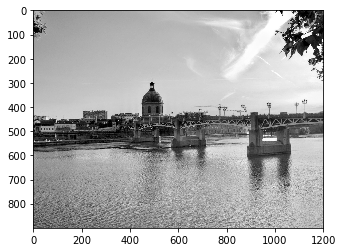

In [72]:
#######################################################################################################
#         ,----,                             ,--,                                                     # 
#       ,/   .`|  ,----..                 ,---.'|       ,----..                                       # 
#     ,`   .'  : /   /   \                |   | :      /   /   \                 .--.--.       ,---,. # 
#   ;    ;     //   .     :          ,--, :   : |     /   .     :          ,--, /  /    '.   ,'  .' | # 
# .'___,/    ,'.   /   ;.  \       ,'_ /| |   ' :    .   /   ;.  \       ,'_ /||  :  /`. / ,---.'   | # 
# |    :     |.   ;   /  ` ;  .--. |  | : ;   ; '   .   ;   /  ` ;  .--. |  | :;  |  |--`  |   |   .' # 
# ;    |.';  ;;   |  ; \ ; |,'_ /| :  . | '   | |__ ;   |  ; \ ; |,'_ /| :  . ||  :  ;_    :   :  |-, # 
# `----'  |  ||   :  | ; | '|  ' | |  . . |   | :.'||   :  | ; | '|  ' | |  . . \  \    `. :   |  ;/| # 
#     '   :  ;.   |  ' ' ' :|  | ' |  | | '   :    ;.   |  ' ' ' :|  | ' |  | |  `----.   \|   :   .' # 
#     |   |  ''   ;  \; /  |:  | | :  ' ; |   |  ./ '   ;  \; /  |:  | | :  ' ;  __ \  \  ||   |  |-, # 
#     '   :  | \   \  ',  / |  ; ' |  | ' ;   : ;    \   \  ',  / |  ; ' |  | ' /  /`--'  /'   :  ;/| # 
#     ;   |.'   ;   :    /  :  | : ;  ; | |   ,/      ;   :    /  :  | : ;  ; |'--'.     / |   |    \ # 
#     '---'      \   \ .'   '  :  `--'   \'---'        \   \ .'   '  :  `--'   \ `--'---'  |   :   .' # 
#                 `---`     :  ,      .-./              `---`     :  ,      .-./           |   | ,'   # 
#                            `--`----'                             `--`----'               `----'     # 
#######################################################################################################

                                                                                                  
# Lecture de l'image 
#
#
imgc = Image.open("toulouse.png")
#
# Conversion de l'image RGB en mode gris et normalisation
#
img      = np.array(imgc)
R        = img[:, :, 0]
G        = img[:, :, 1]
B        = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    
M        = (1./255)*np.array(img_gray)
M_Sydney = M[:]
#
# Affichage de la taille de l'image et de l'image en gris si besoin
#
print(np.shape(M))
plt.imshow(M,'gray')
#
# Constantes utiles par la suite
#
m     = np.shape(M)[0] # nombre de lignes de la matrice M
n     = np.shape(M)[1] # nombre de colonnes de la matrice M

Time spent in the determination of the approximated epsilon-rank 0.49019885063171387
Estimated upper bound of the epsilon-rank:  256  for relative threshold:  0.05
Frobenius norm ratio:  0.04861330663066064  reached in  16 iterations
Time spent in the CUR algorithm 0.355104923248291
Time spent in the randomized CUR algorithm 0.29573798179626465
Time spent in the double sided ID algorithm 0.24107146263122559


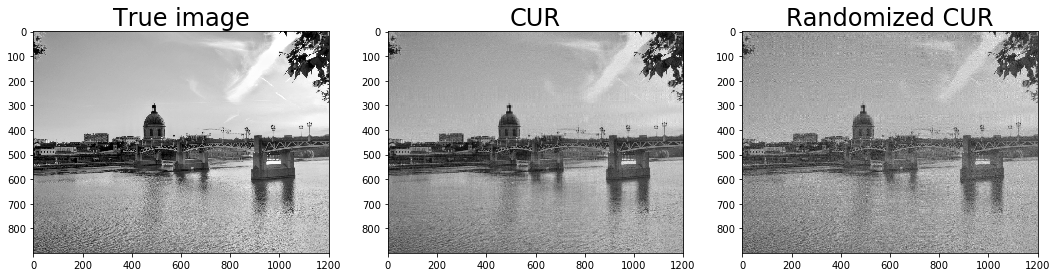

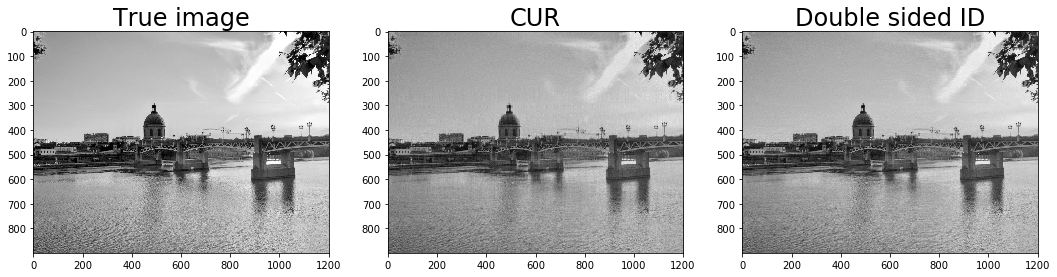

In [73]:
#
# Application of the ID/CUR algorithms to M with erank as target rank
#
epsilon  = 0.05
#epsilon  = 5.e-2
blocking = 16
t_start  = time.time()
Q, erank, norm_ratio, iteration = adaptive_rank_determination(M,epsilon,blocking)
print("Time spent in the determination of the approximated epsilon-rank",time.time()-t_start) 
print("Estimated upper bound of the epsilon-rank: ",erank, " for relative threshold: ",epsilon)
print("Frobenius norm ratio: ",norm_ratio, " reached in ", iteration, "iterations")
erank_Sydney = erank
#
# CUR algorithm
#
t_start        = time.time()
I,J,C, U, R    = cur(M,erank)
JCUR_D         = C@U@R
print("Time spent in the CUR algorithm",time.time()-t_start)
#
# Randomized CUR algorithm
#
p = 5
q = 1
t_start        = time.time()
I, J, C, U, R  = randomized_cur(M,erank,p,q)
JCUR_R         = C@U@R
print("Time spent in the randomized CUR algorithm",time.time()-t_start) 
#
# Double sided ID
#
t_start        = time.time()
I,J,X,Z        = double_sided_ID(M,erank)
JID_S          = X @ extract_subblock(M,I,J) @ Z
print("Time spent in the double sided ID algorithm",time.time()-t_start)
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JCUR_R,'gray')
plt.title('Randomized CUR',fontsize=24)
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID_S,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

(1280, 1920)


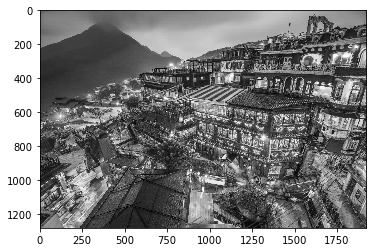

In [74]:
###############################################################
# '########::::'###::::'####:'##:::::'##::::'###::::'##::: ##:#
# ... ##..::::'## ##:::. ##:: ##:'##: ##:::'## ##::: ###:: ##:#
# ::: ##:::::'##:. ##::: ##:: ##: ##: ##::'##:. ##:: ####: ##:#
# ::: ##::::'##:::. ##:: ##:: ##: ##: ##:'##:::. ##: ## ## ##:#
# ::: ##:::: #########:: ##:: ##: ##: ##: #########: ##. ####:#
# ::: ##:::: ##.... ##:: ##:: ##: ##: ##: ##.... ##: ##:. ###:#
# ::: ##:::: ##:::: ##:'####:. ###. ###:: ##:::: ##: ##::. ##:#
# :::..:::::..:::::..::....:::...::...:::..:::::..::..::::..::#
###############################################################
#
# Lecture de l'image 
#
#
imgc = Image.open("taipei.jpg")
#
# Conversion de l'image RGB en mode gris et normalisation
#
img      = np.array(imgc)
R        = img[:, :, 0]
G        = img[:, :, 1]
B        = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    
M        = (1./255)*np.array(img_gray)
M_Sydney = M[:]
#
# Affichage de la taille de l'image et de l'image en gris si besoin
#
print(np.shape(M))
plt.imshow(M,'gray')
#
# Constantes utiles par la suite
#
m     = np.shape(M)[0] # nombre de lignes de la matrice M
n     = np.shape(M)[1] # nombre de colonnes de la matrice M

Time spent in the determination of the approximated epsilon-rank 1.4626710414886475
Estimated upper bound of the epsilon-rank:  576  for relative threshold:  0.05
Frobenius norm ratio:  0.0498624828488579  reached in  36 iterations
Time spent in the CUR algorithm 1.24470853805542
Time spent in the randomized CUR algorithm 0.9440155029296875
Time spent in the double sided ID algorithm 0.8964869976043701


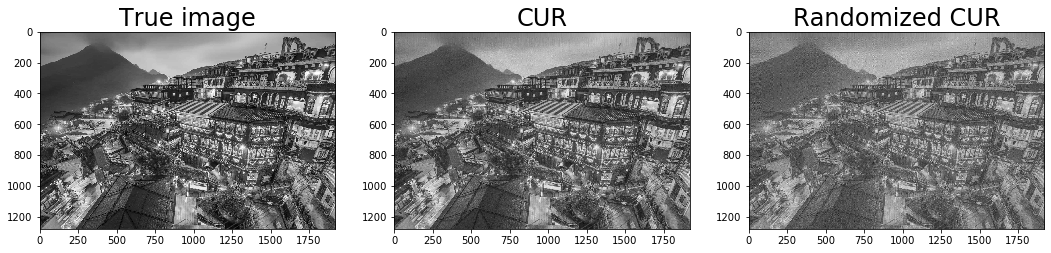

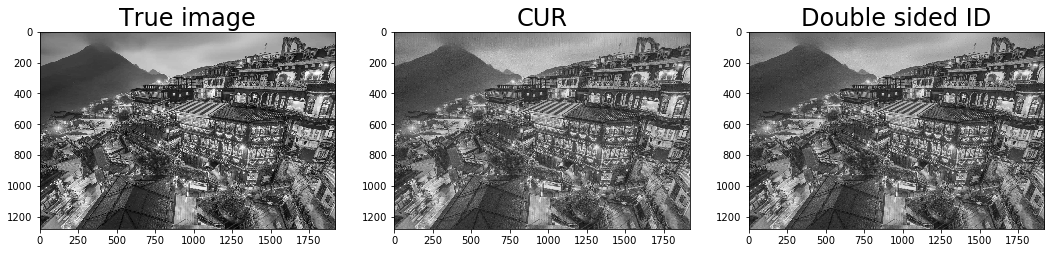

In [75]:
#
# Application of the ID/CUR algorithms to M with erank as target rank
#
epsilon  = 0.05
#epsilon  = 5.e-2
blocking = 16
t_start  = time.time()
Q, erank, norm_ratio, iteration = adaptive_rank_determination(M,epsilon,blocking)
print("Time spent in the determination of the approximated epsilon-rank",time.time()-t_start) 
print("Estimated upper bound of the epsilon-rank: ",erank, " for relative threshold: ",epsilon)
print("Frobenius norm ratio: ",norm_ratio, " reached in ", iteration, "iterations")
erank_Sydney = erank
#
# CUR algorithm
#
t_start        = time.time()
I,J,C, U, R    = cur(M,erank)
JCUR_D         = C@U@R
print("Time spent in the CUR algorithm",time.time()-t_start)
#
# Randomized CUR algorithm
#
p = 5
q = 1
t_start        = time.time()
I, J, C, U, R  = randomized_cur(M,erank,p,q)
JCUR_R         = C@U@R
print("Time spent in the randomized CUR algorithm",time.time()-t_start) 
#
# Double sided ID
#
t_start        = time.time()
I,J,X,Z        = double_sided_ID(M,erank)
JID_S          = X @ extract_subblock(M,I,J) @ Z
print("Time spent in the double sided ID algorithm",time.time()-t_start)
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JCUR_R,'gray')
plt.title('Randomized CUR',fontsize=24)
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID_S,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

## Partie B

Nous cherchons à mettre en oeuvre les algorithmes précédents sur une application liée à la reconstruction d'images.
La cellule suivante vous montre comment charger une image et en déduire la matrice associée. Appliquer alors les algorithmes de 
factorisation vus en Partie A et visualiser les images obtenues en fonction du rang estimé.  

### Sydney

(396, 563)


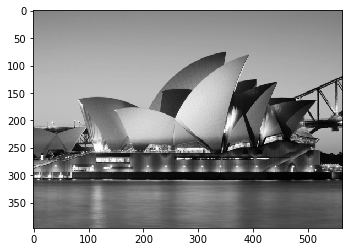

In [61]:
#
# Lecture de l'image 
#
#
imgc = Image.open("Sydney_Opera_House.jpg")
#
# Conversion de l'image RGB en mode gris et normalisation
#
img      = np.array(imgc)
R        = img[:, :, 0]
G        = img[:, :, 1]
B        = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    
M        = (1./255)*np.array(img_gray)
M_Sydney = M[:]
#
# Affichage de la taille de l'image et de l'image en gris si besoin
#
print(np.shape(M))
plt.imshow(M,'gray')
#
# Constantes utiles par la suite
#
m     = np.shape(M)[0] # nombre de lignes de la matrice M
n     = np.shape(M)[1] # nombre de colonnes de la matrice M

Time spent in the determination of the approximated epsilon-rank 0.05693173408508301
Estimated upper bound of the epsilon-rank:  96  for relative threshold:  0.05
Frobenius norm ratio:  0.04190637745405728  reached in  6 iterations
Time spent in the CUR algorithm 0.13234400749206543
Time spent in the randomized CUR algorithm 0.04244256019592285
Time spent in the double sided ID algorithm 0.05222940444946289


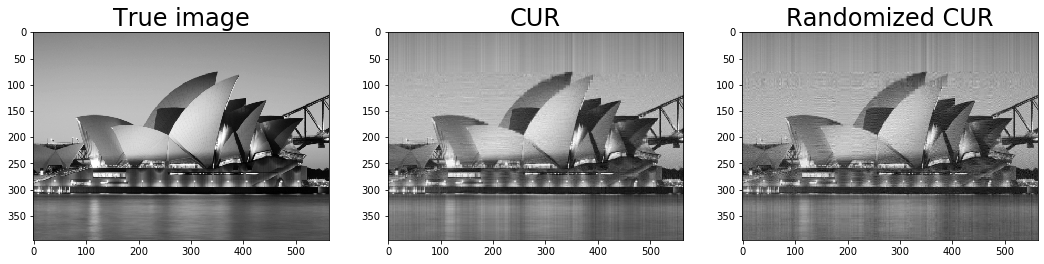

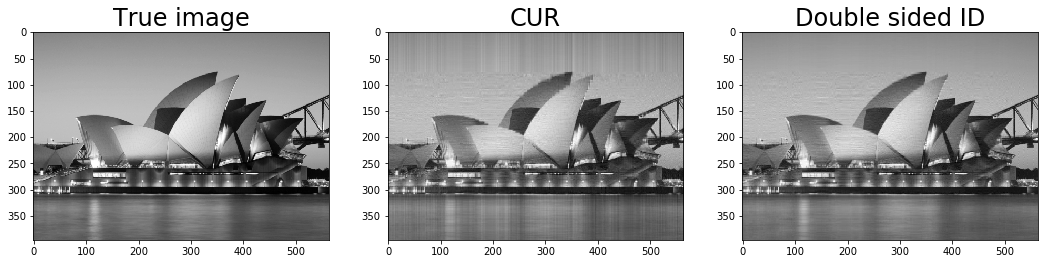

In [62]:
################################################################
# :'######::'##:::'##:'########::'##::: ##:'########:'##:::'##:#
# '##... ##:. ##:'##:: ##.... ##: ###:: ##: ##.....::. ##:'##::#
#  ##:::..:::. ####::: ##:::: ##: ####: ##: ##::::::::. ####:::#
# . ######::::. ##:::: ##:::: ##: ## ## ##: ######:::::. ##::::#
# :..... ##:::: ##:::: ##:::: ##: ##. ####: ##...::::::: ##::::#
# '##::: ##:::: ##:::: ##:::: ##: ##:. ###: ##:::::::::: ##::::#
# . ######::::: ##:::: ########:: ##::. ##: ########:::: ##::::#
# :......::::::..:::::........:::..::::..::........:::::..:::::#
################################################################
#
# Application of the ID/CUR algorithms to M with erank as target rank
#
epsilon  = 0.05
#epsilon  = 5.e-2
blocking = 16
t_start  = time.time()
Q, erank, norm_ratio, iteration = adaptive_rank_determination(M,epsilon,blocking)
print("Time spent in the determination of the approximated epsilon-rank",time.time()-t_start) 
print("Estimated upper bound of the epsilon-rank: ",erank, " for relative threshold: ",epsilon)
print("Frobenius norm ratio: ",norm_ratio, " reached in ", iteration, "iterations")
erank_Sydney = erank
#
# CUR algorithm
#
t_start        = time.time()
I,J,C, U, R    = cur(M,erank)
JCUR_D         = C@U@R
print("Time spent in the CUR algorithm",time.time()-t_start)
#
# Randomized CUR algorithm
#
p = 5
q = 1
t_start        = time.time()
I, J, C, U, R  = randomized_cur(M,erank,p,q)
JCUR_R         = C@U@R
print("Time spent in the randomized CUR algorithm",time.time()-t_start) 
#
# Double sided ID
#
t_start        = time.time()
I,J,X,Z        = double_sided_ID(M,erank)
JID_S          = X @ extract_subblock(M,I,J) @ Z
print("Time spent in the double sided ID algorithm",time.time()-t_start)
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JCUR_R,'gray')
plt.title('Randomized CUR',fontsize=24)
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID_S,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

### Tokyo

(1008, 1212)


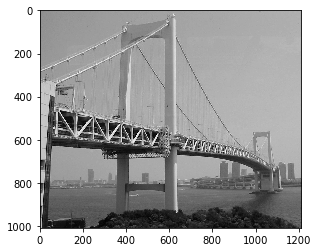

In [63]:
#######################################################
# '########::'#######::'##:::'##:'##:::'##::'#######::#
# ... ##..::'##.... ##: ##::'##::. ##:'##::'##.... ##:#
# ::: ##:::: ##:::: ##: ##:'##::::. ####::: ##:::: ##:#
# ::: ##:::: ##:::: ##: #####::::::. ##:::: ##:::: ##:#
# ::: ##:::: ##:::: ##: ##. ##:::::: ##:::: ##:::: ##:#
# ::: ##:::: ##:::: ##: ##:. ##::::: ##:::: ##:::: ##:#
# ::: ##::::. #######:: ##::. ##:::: ##::::. #######::#
# :::..::::::.......:::..::::..:::::..::::::.......:::#
#######################################################
#
# Lecture de l'image 
#
#
#imgc = Image.open("Sydney_Opera_House.jpg")
imgc = Image.open("Tokyo_Rainbow_Bridge.jpg")
#
# Conversion de l'image RGB en mode gris et normalisation
#
img      = np.array(imgc)
R        = img[:, :, 0]
G        = img[:, :, 1]
B        = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    
M        = (1./255)*np.array(img_gray)
M_Tokyo  = M[:]
#
# Affichage de la taille de l'image et de l'image en gris si besoin
#
print(np.shape(M))
plt.imshow(M,'gray')
#
# Constantes utiles par la suite
#
m     = np.shape(M)[0] # nombre de lignes de la matrice M
n     = np.shape(M)[1] # nombre de colonnes de la matrice M

Time spent in the determination of the approximated epsilon-rank 0.26183438301086426
Estimated upper bound of the epsilon-rank:  160  for relative threshold:  0.05
Frobenius norm ratio:  0.046670414998222005  reached in  10 iterations
Time spent in the CUR algorithm 0.23688435554504395
Time spent in the randomized CUR algorithm 0.11637663841247559
Time spent in the double sided ID algorithm 0.2111201286315918


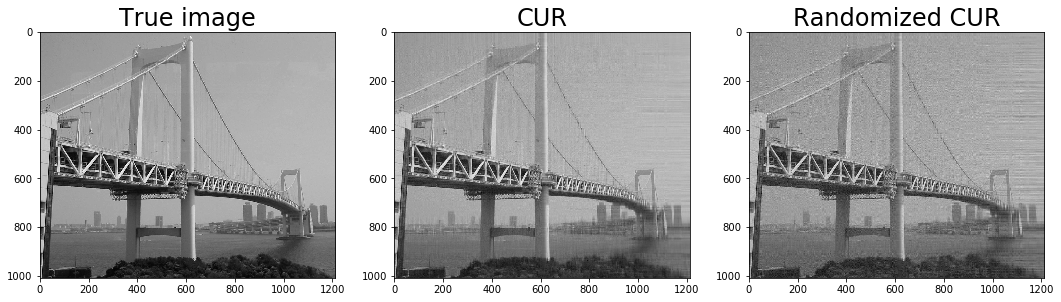

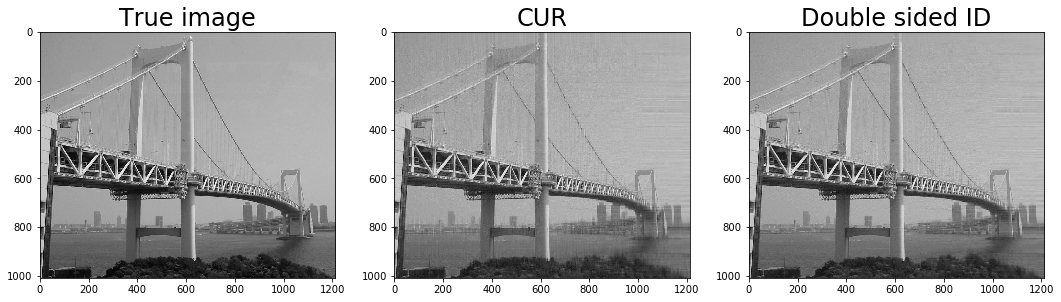

In [64]:
#
# Application of the ID/CUR algorithms to M with erank as target rank
#
epsilon = 0.05
#epsilon  = 5.e-2
blocking = 16
t_start  = time.time()
Q, erank, norm_ratio, iteration = adaptive_rank_determination(M,epsilon,blocking)
print("Time spent in the determination of the approximated epsilon-rank",time.time()-t_start) 
print("Estimated upper bound of the epsilon-rank: ",erank, " for relative threshold: ",epsilon)
print("Frobenius norm ratio: ",norm_ratio, " reached in ", iteration, "iterations")
erank_Tokyo = erank
#
# CUR algorithm
#
t_start        = time.time()
I,J,C, U, R    = cur(M,erank)
JCUR_D         = C@U@R
print("Time spent in the CUR algorithm",time.time()-t_start)
#
# Randomized CUR algorithm
#
p = 5
q = 1
t_start        = time.time()
I, J, C, U, R  = randomized_cur(M,erank,p,q)
JCUR_R         = C@U@R
print("Time spent in the randomized CUR algorithm",time.time()-t_start) 
#
# Double sided ID
#
t_start        = time.time()
I,J,X,Z        = double_sided_ID(M,erank)
JID_T          = X @ extract_subblock(M,I,J) @ Z
print("Time spent in the double sided ID algorithm",time.time()-t_start)
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JCUR_R,'gray')
plt.title('Randomized CUR',fontsize=24)
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID_T,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

### Hamburg

(524, 932)


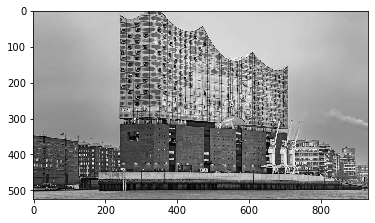

In [65]:
################################################################################
# '##::::'##::::'###::::'##::::'##:'########::'##::::'##:'########:::'######:::#
#  ##:::: ##:::'## ##::: ###::'###: ##.... ##: ##:::: ##: ##.... ##:'##... ##::#
#  ##:::: ##::'##:. ##:: ####'####: ##:::: ##: ##:::: ##: ##:::: ##: ##:::..:::#
#  #########:'##:::. ##: ## ### ##: ########:: ##:::: ##: ########:: ##::'####:#
#  ##.... ##: #########: ##. #: ##: ##.... ##: ##:::: ##: ##.. ##::: ##::: ##::#
#  ##:::: ##: ##.... ##: ##:.:: ##: ##:::: ##: ##:::: ##: ##::. ##:: ##::: ##::#
#  ##:::: ##: ##:::: ##: ##:::: ##: ########::. #######:: ##:::. ##:. ######:::#
# ..:::::..::..:::::..::..:::::..::........::::.......:::..:::::..:::......::::#
################################################################################
#
# Lecture de l'image [couleur] 
#
#
imgc = Image.open("Hamburg_Elbphilarmonie.jpg")
#
# Conversion de l'image RGB en mode gris et normalisation
#
img      = np.array(imgc)
R        = img[:, :, 0]
G        = img[:, :, 1]
B        = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000
    
M         = (1./255)*np.array(img_gray)
M_Hamburg = M[:]

print(np.shape(M))
plt.imshow(M,'gray')
#
# Constantes utiles par la suite
#
m     = np.shape(M)[0] # nombre de lignes de la matrice M
n     = np.shape(M)[1] # nombre de colonnes de la matrice M

Time spent in the determination of the approximated epsilon-rank 0.2673532962799072
Estimated upper bound of the epsilon-rank:  272  for relative threshold:  0.05
Frobenius norm ratio:  0.047317082720480345  reached in  17 iterations
Time spent in the CUR algorithm 0.14325857162475586
(272, 932)
Time spent in the randomized CUR algorithm 0.17193937301635742
(272, 932)
Time spent in the double sided ID algorithm 0.12222051620483398
(272, 932)


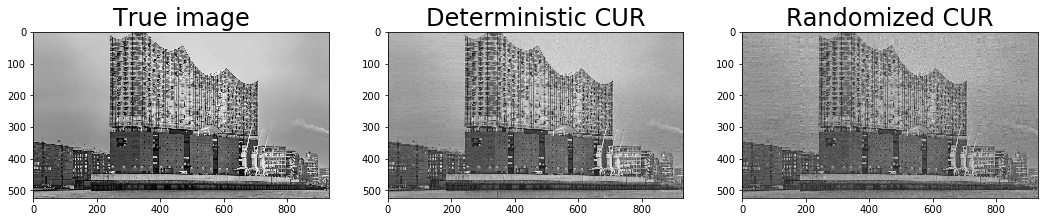

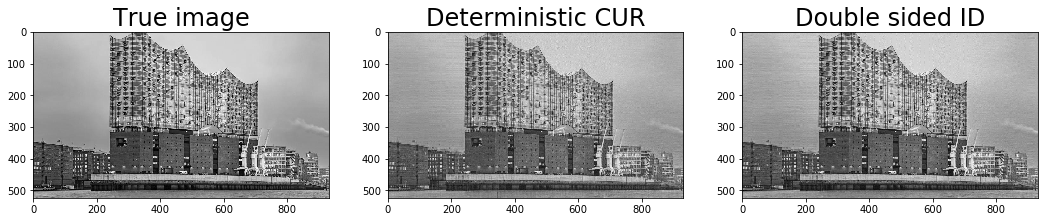

In [66]:
#
# Application of the ID/CUR algorithms to M with erank as target rank
#
t_start  = time.time()
Q, erank, norm_ratio, iteration = adaptive_rank_determination(M,epsilon,blocking)
print("Time spent in the determination of the approximated epsilon-rank",time.time()-t_start) 
print("Estimated upper bound of the epsilon-rank: ",erank, " for relative threshold: ",epsilon)
print("Frobenius norm ratio: ",norm_ratio, " reached in ", iteration, "iterations")
erank_Hamburg = erank
#
# CUR algorithm
#
t_start        = time.time()
I,J,C, U, R    = cur(M,erank)
JCUR_D         = C@U@R
print("Time spent in the CUR algorithm",time.time()-t_start)
print(np.shape(R))
#
# Randomized CUR algorithm
#
p = 5
q = 1
t_start        = time.time()
I,J,C, U, R    = randomized_cur(M,erank,p,q)
JCUR_R         = C@U@R
print("Time spent in the randomized CUR algorithm",time.time()-t_start) 
print(np.shape(R))
#
# Double sided ID
#
t_start  = time.time()
I,J,X,Z  = double_sided_ID(M,erank)
JID_H    = X @ extract_subblock(M,I,J) @ Z
print("Time spent in the double sided ID algorithm",time.time()-t_start)
print(np.shape(Z))
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('Deterministic CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JCUR_R,'gray')
plt.title('Randomized CUR',fontsize=24)
plt.show()

plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(JCUR_D,'gray')
plt.title('Deterministic CUR',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID_H,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

**Question:**
* B.1 Prenez trois valeurs pour $\epsilon$ (par exemple $\epsilon=0.5$, $\epsilon=0.1$ et $\epsilon=0.05$) et analysez la qualité de l'approximation pour les images considérées. Qu'observez-vous ? 

**Réponse**:

Plus $\epsilon$ est faible, meilleure est l'approximation pour les images considérées. En effet, on a les exemples ci-dessous : 

- Pour $\epsilon=0.5$, la qualité de l'approximation pour les images considérées est moins bonne que pour 5.e-2 [flou] (CUR, Randomized CUR et Double sided ID) (par rapport à l'image réelle)
- Pour $\epsilon=0.1$, la qualité de l'approximation pour les images considérées est bien meilleure que pour $\epsilon=0.5$ [moins flou que pour $\epsilon=0.5$]
- Pour $\epsilon=0.05$, la qualité de l'approximation pour les images considérées est bien meilleure que pour $\epsilon=0.1$, la qualité des images du CUR et du Randomized CUR est très proche de l'image réelle.

**Question:**
* B.2 Observez-vous des différences de qualité de reconstruction entre les algorithmes pour une précision identique ?

**Réponse**:

Pour une précision identique, les différences de qualité de reconstruction entre les algorithmes sont en effet différents, puisque Randomized CUR a la moins bonne qualité, puis s'ensuit l'algorithme Deterministic CUR et enfin l'approximation avec la meilleure qualité de l'approximation est double sided ID.


## Partie C.

En vous basant notamment sur les notes de cours, le chapitre 11 de <a href="https://arxiv.org/pdf/1607.01649.pdf">Martinsson (2019)</a>, la section 13 de <a href="https://arxiv.org/pdf/2002.01387.pdf">Martinsson et Tropp (2020)</a>,  répondre aux deux questions suivantes:

* C.1 Donner les avantages et inconvénients éventuels de la décomposition déterministe CUR-ID. 

**Réponse**:

Les avantages éventuels de la décomposition déterminsite CUR-ID est que : efficace et rapide.
Les inconvénients de la décomposition déterminsite CUR-ID : pas de parallélisation possible et complexité pas aussi intéressante.

* C.2 Expliquer comment paralléliser l'algorithme aléatoire CUR-ID. 

**Réponse**:

Afin de paralléliser l'algorithme aléatoire de CUR-ID, il faudrait : ...

## Partie D.

Appliquer l'algorithme de factorisation non-négative de <a href="https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf">Lee et Cheung</a> (Théoreme 1) pour obtenir une approximation d'une image donnée en norme de Frobenius. Une attention sera donnée à l'implantation proposée et au temps de restitution obtenu.  Vous pourrez à cet effet utiliser les fonctions multiply et divide de NumPy.

In [67]:
def nmf(M,erank,epsilon,iteration_max):
    
    """
    Non-negative matrix factorization for matrix M.
    
    Input: 
    M:             matrix to be analysed [array type] (of shape (m,n))
    erank:         estimated rank (upper bound of epsilon-rank(M))
    epsilon:       relative threshold related to the accuracy of the projection (in the Frobenius norm) (0<= epsilon <= 1)
    iteration_max: maximal number of iterations [int]
    
    Output:
    X,Y:           matrices with positive entries such that $ \|M - X Y \|_F \le \epsilon \|M \|_F$
    iteration:     effective number of iterations
    """
    
    m     = np.shape(M)[0] # nombre de lignes de la matrice M
    n     = np.shape(M)[1] # nombre de colonnes de la matrice M
    
    # Specify two possible first iterates for X and Y
    X = np.random.rand(m,erank) 
    Y = np.random.rand(erank,n)

    #X = np.ones((m,erank))
    #Y = np.ones((erank,n))
    # Set variables
    norm_A_Fro    = norm(M,'fro')
    iteration     = 0
    
    # Algorithm 
    while norm(M-X@Y,'fro') > epsilon*norm_A_Fro and iteration < iteration_max:
        #
        # TO DO
        #
        
        Y = np.multiply(Y,np.divide(X.T@M,X.T@X@Y))
        X = np.multiply(X, np.divide(M@Y.T,X@Y@Y.T))
        #Y = Y1
        
        iteration = iteration + 1
        #
        # END TO DO
        #
        if iteration%25 == 0:
            print(iteration,norm(M-X@Y,'fro')/norm_A_Fro)

    return X,Y,iteration

25 0.22585984020311908
50 0.17611838970661997
75 0.1456321545793675
100 0.12557677795288769
125 0.11236757084327367
150 0.10310846067168007
175 0.09626555561283075
200 0.09099564892132081
225 0.08681174444919854
250 0.08340577294562822
275 0.0805732563468839
300 0.07817675132308731
325 0.07612063638633045
350 0.07433512571950555
375 0.07276793230905171
400 0.0713794047213956
425 0.07013918266911888
450 0.06902373988481948
475 0.06801452934144442
500 0.06709648168377141
525 0.06625714231811868
550 0.0654861779577475
575 0.06477503758531844
600 0.06411664990914022
625 0.06350514088916678
650 0.06293555085459061
675 0.06240362974569441
700 0.061905717915219635
725 0.06143859695916013
750 0.06099941445147394
775 0.06058565114062635
800 0.06019506938440373
825 0.05982567704580687
850 0.05947574838173239
875 0.05914377133548179
900 0.0588283102077313
925 0.058528045240432154
950 0.05824181139873576
975 0.05796856989652744
1000 0.05770740547103016
1025 0.05745754361233204
1050 0.0572183110342

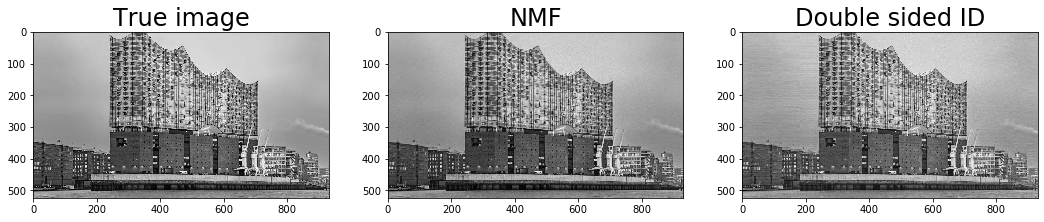

In [68]:
#
# Specify one of the target images here
#
erank = erank_Hamburg
M     = M_Hamburg[:]
JID   = JID_H[:]
#
# NMF 
#
iteration_max = 3500
epsilon       = 0.05
t_start       = time.time()
X,Y,iteration = nmf(M,erank,epsilon,iteration_max)
print("Time spent in the non-negative matrix factorization (NMF)",time.time()-t_start)
print("Norm ratio: ",norm(M-X@Y,'fro')/norm(M,'fro'), " reached in ", iteration, "iterations") 
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(X@Y,'gray')
plt.title('NMF',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

25 0.20616910527319518
50 0.13127809880492178
75 0.1019840002053497
100 0.08643224786649371
125 0.07672177158239012
150 0.07003171973761033
175 0.06512882305333827
200 0.06136019946949316
225 0.05835833279380197
250 0.0559141377252613
275 0.05389477506646748
300 0.052201047722665164
325 0.05075974519599269
Time spent in the non-negative matrix factorization (NMF) 1.4403069019317627
Norm ratio:  0.04999304184318832  reached in  340 iterations


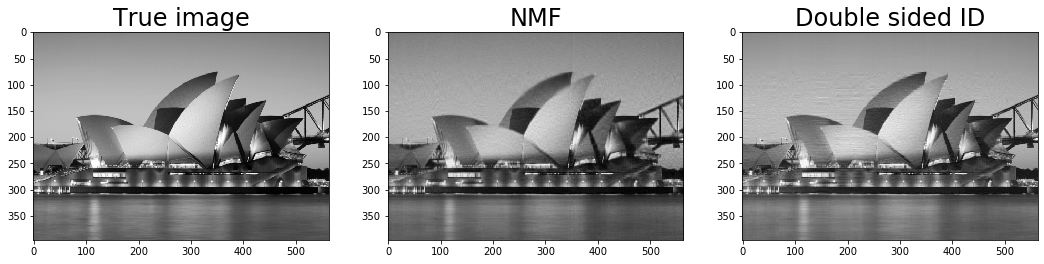

In [69]:
#
# Specify one of the target images here
#
erank = erank_Sydney
M     = M_Sydney[:]
JID   = JID_S[:]
#
# NMF 
#
iteration_max = 2000
epsilon       = 0.05
t_start       = time.time()
X,Y,iteration = nmf(M,erank,epsilon,iteration_max)
print("Time spent in the non-negative matrix factorization (NMF)",time.time()-t_start)
print("Norm ratio: ",norm(M-X@Y,'fro')/norm(M,'fro'), " reached in ", iteration, "iterations") 
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(X@Y,'gray')
plt.title('NMF',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

25 0.20395581805818866
50 0.15593189939737465
75 0.1285836678616273
100 0.10773806094872397
125 0.09458009923613056
150 0.08571179839669996
175 0.07933083715505503
200 0.07450270393115013
225 0.07069006235333336
250 0.06758898742191503
275 0.06501149547375727
300 0.06282968256844909
325 0.06095320878371155
350 0.05931822240607991
375 0.05787865602245587
400 0.05659995840760773
425 0.05545551122852397
450 0.054424487282515
475 0.05349045681813269
500 0.052640338560750906
525 0.051863504965628096
550 0.05115112749164777
575 0.05049572355295341
Time spent in the non-negative matrix factorization (NMF) 13.767113208770752
Norm ratio:  0.04998447898086941  reached in  596 iterations


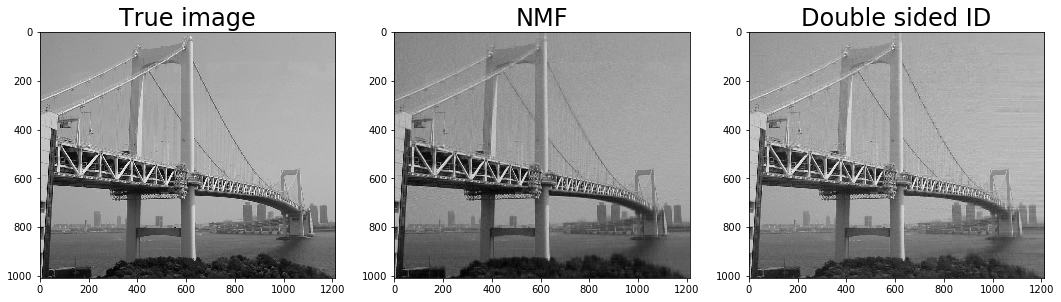

In [70]:
#
# Specify one of the target images here
#
erank = erank_Tokyo
M     = M_Tokyo[:]
JID   = JID_T[:]
#
# NMF 
#
iteration_max = 2000
epsilon       = 0.05
t_start       = time.time()
X,Y,iteration = nmf(M,erank,epsilon,iteration_max)
print("Time spent in the non-negative matrix factorization (NMF)",time.time()-t_start)
print("Norm ratio: ",norm(M-X@Y,'fro')/norm(M,'fro'), " reached in ", iteration, "iterations") 
#
# Plots
#
plt.figure(figsize=(18,18))
plt.subplot(1,3,1)
plt.imshow(M,'gray')
plt.title('True image',fontsize=24)
plt.subplot(1,3,2)
plt.imshow(X@Y,'gray')
plt.title('NMF',fontsize=24)
plt.subplot(1,3,3)
plt.imshow(JID,'gray')
plt.title('Double sided ID',fontsize=24)
plt.show()

### Questions:

* D.1 Pour $\epsilon=0.05$, indiquer pour chacune des images le temps de restitution et le nombre d'itérations. Commenter la vitesse de convergence de la méthode et la qualité de l'image reconstruite.

**Réponse**:

Pour $\epsilon=0.05$, pour : 

- l'image Hamburg  : 3076 itérations avec un temps de restitution de 51.0134437084198  avec norm_ratio : 0.04999870055903614 [quality]
- l'image Sydney   : 340 itérations avec un temps de restitution de 1.4403069019317627 avec norm_ratio : 0.04999304184318832 [quality]
- l'image Tokyo    : 596 itérations avec un temps de restitution de 13.767113208770752 avec norm_ratio : 0.04998447898086941 [quality]

La vitesse de convergence de la méthode dépend de l'image, elle est plus rapide pour Sydney que pour les autres villes. 

La qualité de l'image reconstruite est nette pour la méthode NMF avec l'image Hamburg, Sydney et Tokyo.

* D.2 A chaque fois, nous avons considéré une image exacte dans chacun des algorithmes pour en déduire une approximation de rang faible. Comment obtenir une approximation de rang faible si l'on dispose uniquement d'une image de qualité médiocre comme image initiale ? Proposez un algorithme. 

**Réponse**:

Si l'on dispose uniquement d'une image de qualité médiore comme image initiale, afin d'obtenir une approximation de rang faible, on utilise un algorithme d'optimisation, comme l'algorithme avec la méthode des sous-gradients. 

* Bonus : Quel(s) algorithme(s) utiliseriez-vous pour approcher (au sens de l'approximation de rang faible) non pas une image mais une séquence d'images (donnée par exemple au sein d'une video) ? 

**Réponse**:

Afin d'approcher (au sens de l'approximation de rang faible) non pas une image mais une séquence d'images (donnée par exemple au sein d'une vidéo), j'utiliserai un algorithme qui s'occupe que d'une partie de la décomposition de l'immge (en général, il s'agit de l'objet "non statique" [pas le fond]) 

### Références  (articles et exposés)

## Articles

* D. Lee and S. Cheung. <a href="https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf">Algorithms for Non-negative Matrix Factorization </a>. Advances in Neural Information Processing Systems 13 (NIPS 2000). 


* P.-G.  Martinsson.  <a href="https://arxiv.org/pdf/1607.01649.pdf">Randomized  methods  for  matrix  computations</a>.  In  M.W.  Mahoney,  J.C.  Duchi,  and  A.C.  Gilbert, editors, The Mathematics of Data, volume 25, chapter 4, pages 187 – 231. American Mathematical Society, IAS/ParkCity Mathematics Series, 2018.


* P.-G.  Martinsson and J. Tropp.  <a href="https://arxiv.org/pdf/2002.01387.pdf">Randomized Numerical Linear Algebra: Foundations & Algorithms</a>. Acta Numerica, 29, pp 403-572, 2020.


* S. Voronin, P.-G.  Martinsson and  <a href="https://users.oden.utexas.edu/~pgm/Pubs/2017_voronin_CUR.pdf">Efficient Algorithms for CUR and Interpolative Matrix Decompositions</a>. Advances in Computational Mathematics, Volume 43, Issue 3, pp 495–516, 2017.

## Exposés

* P.-G.  Martinsson. <a href="https://simons.berkeley.edu/talks/randomized-algorithms-computing-full-matrix-factorizations">Randomized Algorithms for Computing Full Matrix Factorizations</a>, talk given at  
Randomized Numerical Linear Algebra and Applications, September 2018, Simons Institute, Berkeley, 2018.


* P.-G.  Martinsson. <a href="https://www.youtube.com/watch?v=l262Qij6flM">Randomized algorithms for pivoting and for computing interpolatory and CUR factorizations</a>, talk given at E-Numerical Linear Algebra seminars, March 2021.
